In [119]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError
from qiskit.visualization import plot_histogram 
import typing
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

from qiskit_aer import Aer
from qiskit import transpile
from qiskit_aer.primitives import Sampler
from qiskit.primitives.backend_sampler import BackendSampler
from qiskit.quantum_info import Statevector
from qiskit.circuit import Instruction

In [129]:

steane_t_enc_block = QuantumCircuit(7, 1, name="steane_block")
for i in range(1, 3):
    steane_t_enc_block.h(i)

steane_t_enc_block.h(6)
steane_t_enc_block.t(6)
steane_t_enc_block.barrier()

steane_t_enc_block.cx(1, 0)
steane_t_enc_block.cx(2, 4)
steane_t_enc_block.cx(6, 5)

steane_t_enc_block.cx(2,0)
steane_t_enc_block.cx(3,5)

steane_t_enc_block.cx(6,4)
steane_t_enc_block.cx(2,6)

steane_t_enc_block.cx(3,4)

steane_t_enc_block.cx(1,5)
steane_t_enc_block.cx(1,6)

steane_t_enc_block.cx(3 ,0)

steane_t_enc_block.barrier()

for i in range(0, 7):
    steane_t_enc_block.h(i)
    steane_t_enc_block.measure(i,0)
steane_t_enc_block.barrier()

# convert to instruction
steane_t_block_instr = steane_t_enc_block.to_instruction()

In [ ]:
steane_t_enc_block = QuantumCircuit(7, 1, name="steane_block")
for i in range(1, 3):
    steane_t_enc_block.h(i)

steane_t_enc_block.h(6)
steane_t_enc_block.t(6)
steane_t_enc_block.barrier()

steane_t_enc_block.cx(1, 0)
steane_t_enc_block.cx(2, 4)
steane_t_enc_block.cx(6, 5)

steane_t_enc_block.cx(2,0)
steane_t_enc_block.cx(3,5)

steane_t_enc_block.cx(6,4)
steane_t_enc_block.cx(2,6)

steane_t_enc_block.cx(3,4)

steane_t_enc_block.cx(1,5)
steane_t_enc_block.cx(1,6)

steane_t_enc_block.cx(3 ,0)

steane_t_enc_block.barrier()

for i in range(0, 7):
    steane_t_enc_block.h(i)
    steane_t_enc_block.measure(i,0)
steane_t_enc_block.barrier()

# convert to instruction
steane_t_block_instr = steane_t_enc_block.to_instruction()

In [130]:
# applies h to 7 qubits 

h_block = QuantumCircuit(7, 1, name="h_block")
for i in range(0, 7):
    h_block.h(i)

# convert to instruction
h_block_instr = h_block.to_instruction()

In [131]:
# applies cz to 7 qubits

cz_block = QuantumCircuit(14, 1, name="cz_block")
for i in range(0, 7):
    cz_block.cz(i, i + 7)


# convert to instruction
cz_block_instr = cz_block.to_instruction()

In [132]:
# applies identity to 7 qubits

id_block = QuantumCircuit(7,1, name = "id_block")

for i in range(0, 7):
    id_block.id(i)

id_block_instr = id_block.to_instruction()

In [141]:
# applies x to 7 qubits

x_block = QuantumCircuit(7,1, name = "x_block")

for i in range(0, 7):
    x_block.x(i)

x_block_instr = x_block.to_instruction()

In [142]:
def prepare_t_state(qc_prep: QuantumCircuit, block_instr: Instruction):
    qc_prep.append(id_block_instr, range(0,7), range(0,1))
    qc_prep.append(block_instr, range(0,7), range(0,1))
    qc_prep.append(id_block_instr, range(0,7), range(0,1))

In [ ]:
def prepare_state(qc_prep: QuantumCircuit, encode_block: Instruction, log_block: Instruction):
    qc_prep.append(id_block_instr, range(0,7), range(0,7))
    qc_prep.append(encode_block, range(0,7), range(0,7))
    qc_prep.append(id_block_instr, range(0,7), range(0,7))
    qc_prep.append(log_block,range(0,7), range(0,7))

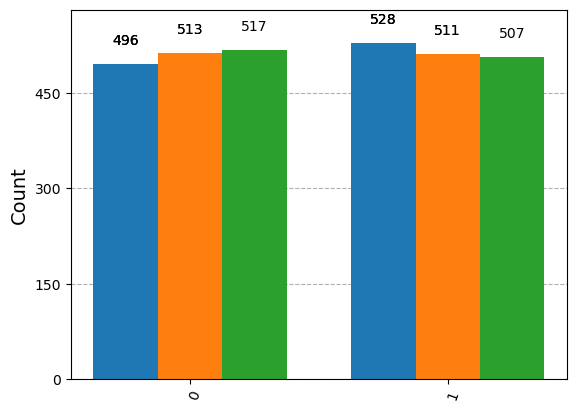

In [144]:
# state_arr will hold the 3 T states we get from the Steane encoding
state_arr = []

qc1 = QuantumCircuit(7,1)
qc2 = QuantumCircuit(7,1)
qc3 = QuantumCircuit(7,1)

qc_arr = [qc1, qc2, qc3]
counts_arr = []





for i in range(0,3): 
    prepare_t_state(qc_arr[i], steane_t_block_instr)
    simulator = Aer.get_backend('statevector_simulator')
    steane_t = transpile(qc_arr[i], simulator)
    job = simulator.run(steane_t, shots = 1024)
    result = job.result()
    counts = result.get_counts()
    state = result.get_statevector()
    #print(state)
    state_arr.append(state)
    counts_arr.append(counts)
    

plot_histogram(counts_arr)



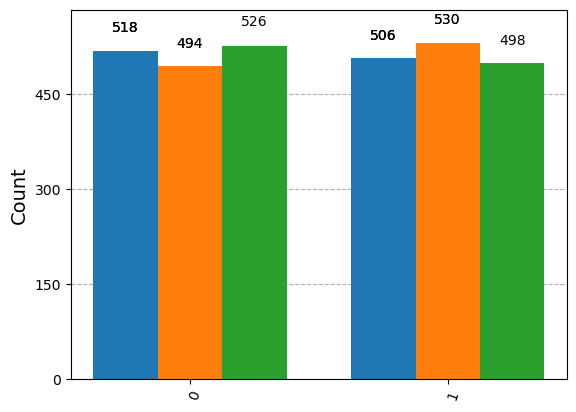

In [ ]:
state_arr = []

qc1 = QuantumCircuit(7,1)
qc2 = QuantumCircuit(7,1)
qc3 = QuantumCircuit(7,1)

qc_arr = [qc1, qc2, qc3]
counts_arr = []





for i in range(0,3): 
    prepare_state(qc_arr[i], steane_block_instr)
    simulator = Aer.get_backend('statevector_simulator')
    steane_t = transpile(qc_arr[i], simulator)
    job = simulator.run(steane_t, shots = 1024)
    result = job.result()
    counts = result.get_counts()
    state = result.get_statevector()
    #print(state)
    state_arr.append(state)
    counts_arr.append(counts)
    

plot_histogram(counts_arr)

